In [47]:
from database.adatabase import ADatabase
import pandas as pd
import matplotlib.pyplot as plt

In [48]:
sapling = ADatabase("sapling")

In [49]:
sapling.connect()
trades = sapling.retrieve("positions")
sapling.disconnect()

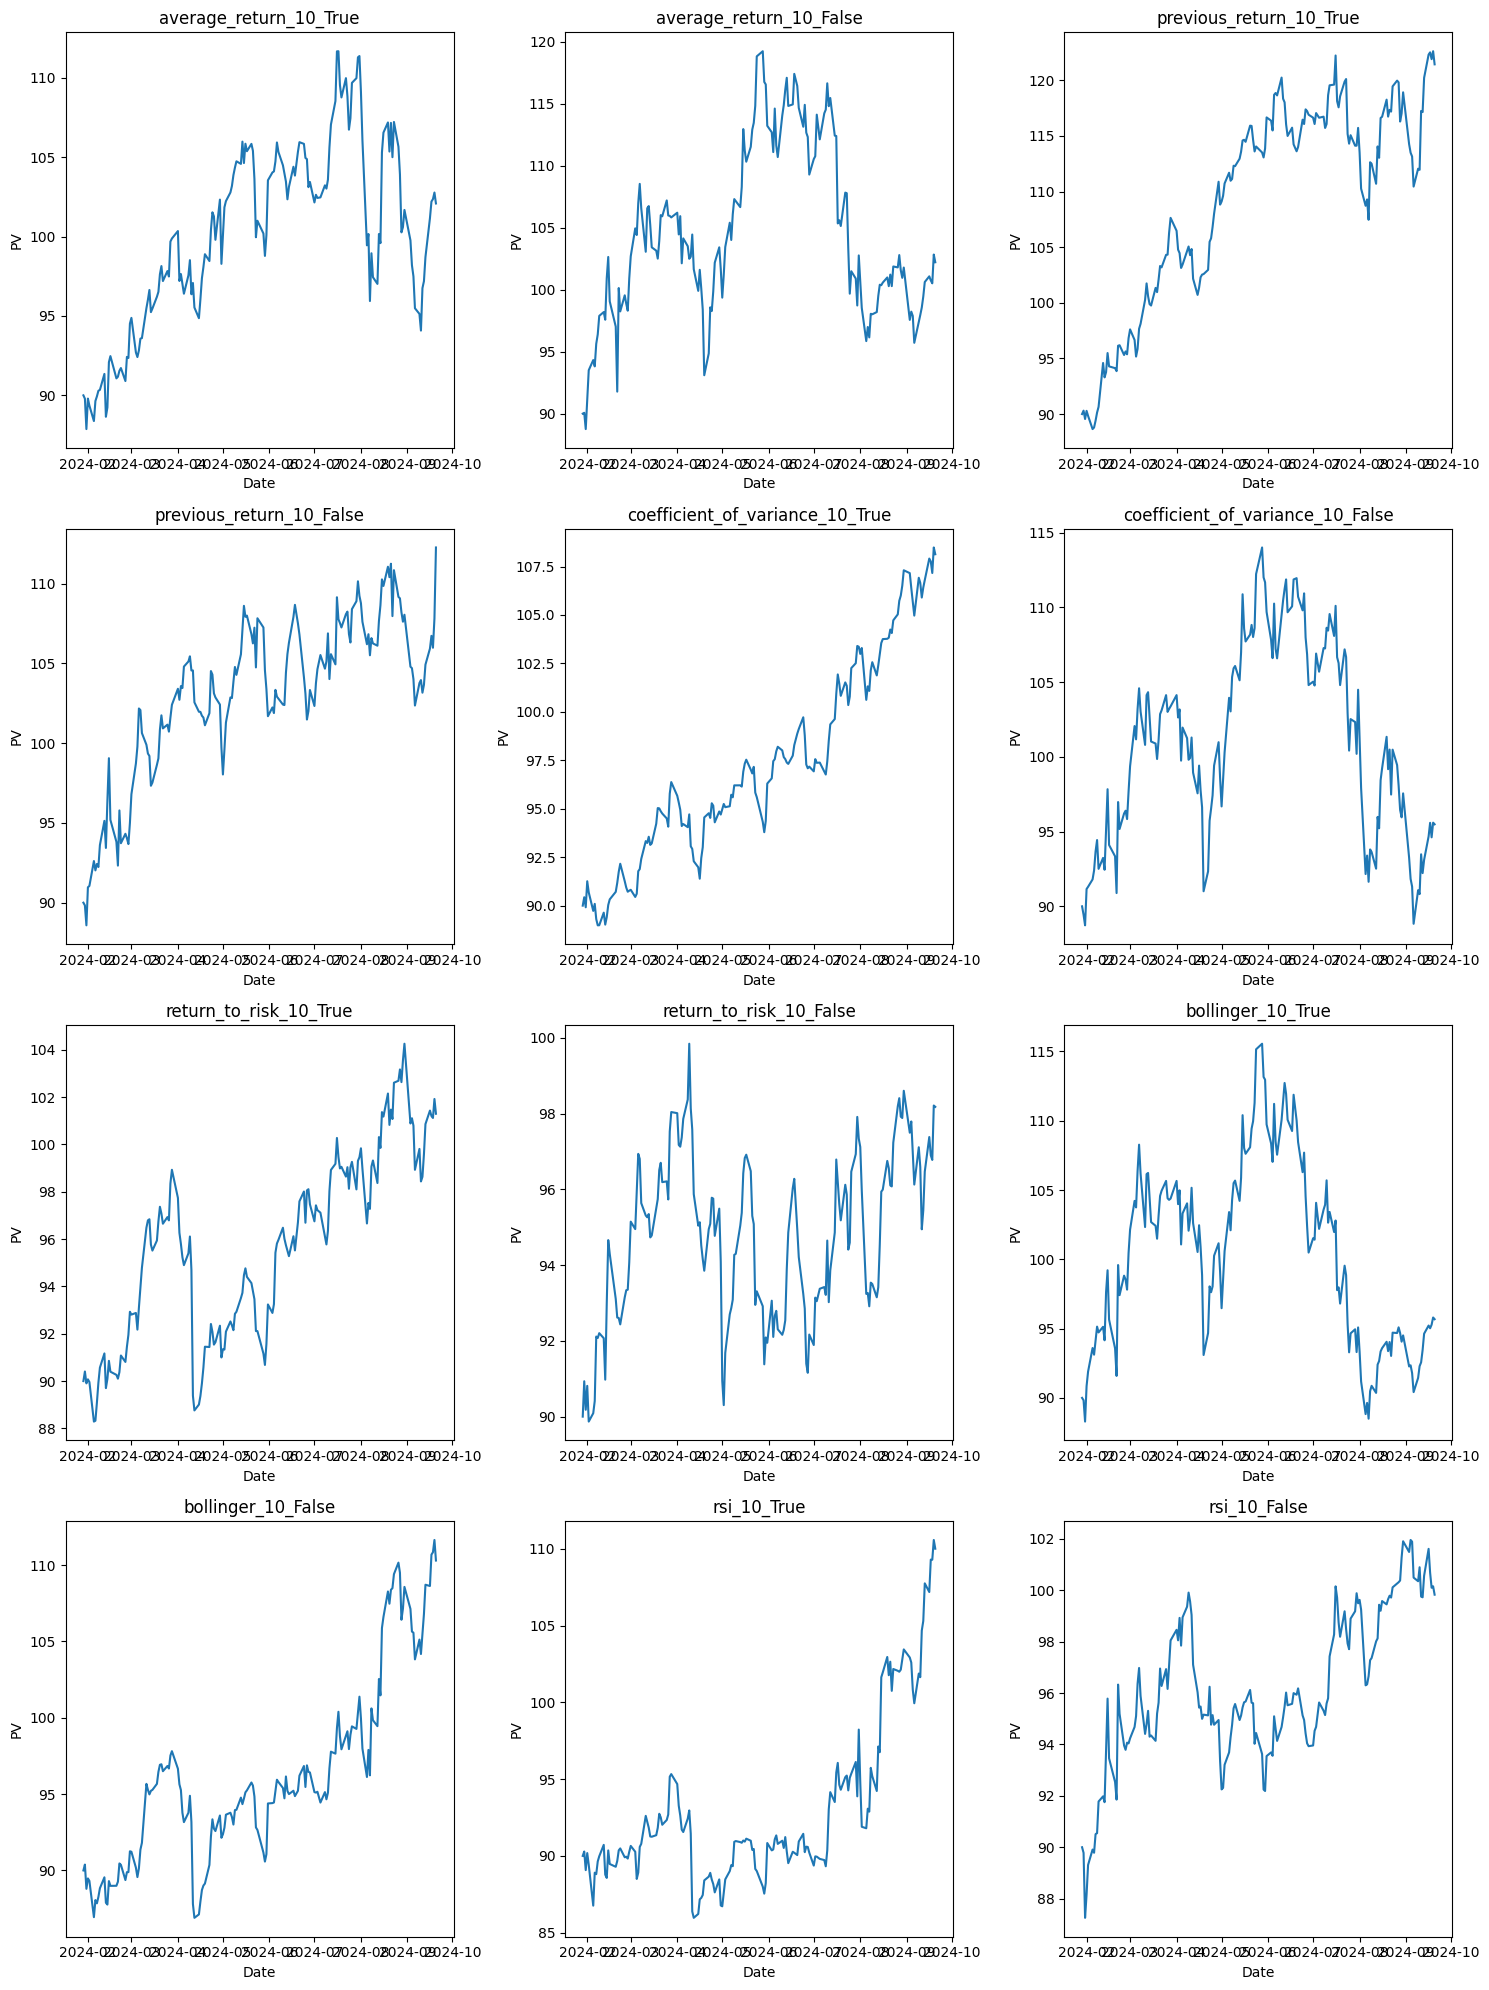

In [50]:
analysis = []

# Assuming trades DataFrame is already defined
trades["pv"] = trades["adjclose"] * trades["quantity"]

# Get unique values
names = trades["name"].unique()
positions = [10]
booleans = [True, False]

# Calculate the number of plots
num_plots = len(names) * len(positions) * len(booleans)
num_columns = 3
num_rows = -(-num_plots // num_columns)  # Ceiling division

fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, num_rows * 5))

# Flatten the axes array for easier indexing
axes = axes.flatten()

plot_index = 0
for name in names:
    for position in positions:
        for boolean in booleans:
            portfolio = trades.pivot_table(index=["date", "name", "positions", "boolean"], 
                                           columns="position", values="pv").reset_index()
            portfolio = portfolio[(portfolio["name"] == name) & 
                                  (portfolio["positions"] == position) & 
                                  (portfolio["boolean"] == boolean)]
            if position == 1:
                portfolio["pv"] = portfolio[0]
            else:
                portfolio["pv"] = [sum([row[1][i] for i in range(trades["position"].max())]) 
                                   for row in portfolio.iterrows()]
            stuff = {}
            stuff["name"] = name
            stuff["position"] = position
            stuff["boolean"] = boolean
            stuff["pv"] = portfolio["pv"].iloc[-1].item()
            stuff["std"] = portfolio["pv"].std()
            analysis.append(stuff)
            # Plotting
            ax = axes[plot_index]
            ax.plot(portfolio["date"].values, portfolio["pv"].values)
            ax.set_title(f"{name}_{position}_{boolean}")
            ax.set_xlabel('Date')
            ax.set_ylabel('PV')
            
            plot_index += 1

# Hide any unused axes
for i in range(plot_index, len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()


In [51]:
a = pd.DataFrame(analysis)
a["risk_to_return"] = a["pv"] / a["std"]
a.sort_values("pv",ascending=False)

,name,position,boolean,pv,std,risk_to_return
2,previous_return,10,True,121.431373,9.221038,13.168949
3,previous_return,10,False,112.266980,5.049701,22.232403
9,bollinger,10,False,110.296663,6.070946,18.167954
10,rsi,10,True,110.011587,5.383391,20.435369
4,coefficient_of_variance,10,True,108.133268,5.161696,20.949175
1,average_return,10,False,102.204690,6.773613,15.088653
0,average_return,10,True,102.085946,5.717865,17.853858
6,return_to_risk,10,True,101.296413,3.929899,25.775833
11,rsi,10,False,99.826387,2.987192,33.418139
7,return_to_risk,10,False,98.176439,2.186658,44.897933


In [52]:
trade_analysis = trades[(trades["name"]=="coefficient_of_variance") & (trades["positions"]==10) & (trades["boolean"]==False)]
trade_analysis["return"] = (trade_analysis["adjclose"] - trade_analysis["buy_price"]) / trade_analysis["buy_price"]

C:\Users\eric\AppData\Local\Temp\ipykernel_15520\3748924737.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trade_analysis["return"] = (trade_analysis["adjclose"] - trade_analysis["buy_price"]) / trade_analysis["buy_price"]


In [53]:
trade_analysis.sort_values("return",ascending=False)

,side,type,time_in_force,symbol,notional,adjclose,quantity,buy_date,buy_price,date,position,name,positions,boolean,pv,return
8330,buy,market,day,SMCI,10.36,1004.000000,0.013402,2024-02-12,773.010000,2024-02-15,0,coefficient_of_variance,10,False,13.455764,0.298819
8370,buy,market,day,SMCI,10.36,975.520000,0.013402,2024-02-12,773.010000,2024-02-22,0,coefficient_of_variance,10,False,13.074070,0.261976
8950,buy,market,day,SMCI,11.68,952.360000,0.014922,2024-05-13,782.760000,2024-05-15,0,coefficient_of_variance,10,False,14.210697,0.216669
9044,buy,market,day,NVDA,12.02,114.805868,0.126846,2024-05-20,94.760907,2024-05-29,4,coefficient_of_variance,10,False,14.562614,0.211532
9034,buy,market,day,NVDA,12.02,113.878055,0.126846,2024-05-20,94.760907,2024-05-28,4,coefficient_of_variance,10,False,14.444925,0.201741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,buy,market,day,NVDA,11.05,102.821370,0.087387,2024-08-26,126.449386,2024-09-06,7,coefficient_of_variance,10,False,8.985225,-0.186858
8770,buy,market,day,SMCI,10.84,713.650000,0.012280,2024-04-15,882.750000,2024-04-19,0,coefficient_of_variance,10,False,8.763485,-0.191560
9437,buy,market,day,TER,11.91,124.216792,0.077181,2024-07-22,154.313152,2024-07-25,7,coefficient_of_variance,10,False,9.587141,-0.195034
9489,buy,market,day,MRNA,11.37,94.170000,0.093067,2024-07-29,122.170000,2024-08-01,9,coefficient_of_variance,10,False,8.764123,-0.229189
